#  Decision Tree

Entropy = 무질서, 불확실성(uncertainty)
cf. 같은 개념 Gini Index

확률 낮으면, entropy 큼(반비례)

Information Gain = 혼잡도 감소 정도를 나타냄, 불확실성 감소정도.
따라서, Gain 가장 큰 column 우선순위로 분류, 그래야 불학실성 감소폭이 커짐

Gain Ratio = 가지 많으면 안좋음, 따라서 평준화 시켜 과정을 줄임(약간의 값을 변형 ? )


overfitting = 가지 많아서 복잡, 이런 경우 parameter 조정 필요

Ramdom Forest(앙상블 ensemble) = 나무 여러개 만들고 다수결(Majority Voting)으로 결정
ex) 여러명의 전문가 > 한명의 전문가


분류대상 p개 / 분류통 n개
만약, p=n이면 bagging tree(과일을 하나하나 자루에 담아 놓은 나무)

이상적 분류통은 1~5개

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

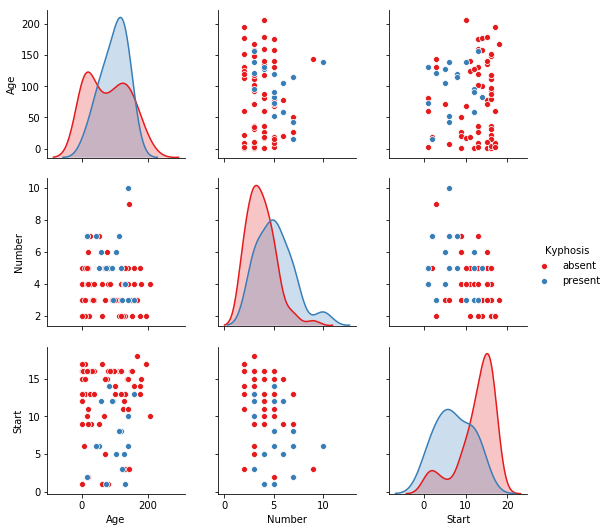

In [4]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x=df.drop('Kyphosis', axis=1)
y=df['Kyphosis']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [8]:
print(x_train[:10])

    Age  Number  Start
30   31       3     16
13    1       4     12
20   22       2     16
5     1       2     16
41   35       3     13
54  140       4     15
59  102       3     13
47  131       5     13
66  195       2     17
70  158       5     14


## Decision Trees

We'll start just by training a single decision tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
# criterion='entropy' 안하면 가장으로 gini가 설정됨
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [12]:
predictions = dtree.predict(x_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(confusion_matrix(y_test, predictions))

[[18  2]
 [ 3  2]]


In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

   micro avg       0.80      0.80      0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



In [16]:
# 세번째 feature인 'Start'가 가장 중요하다는 걸 확인 할 수 있다.

dtree.feature_importances_

array([0.1905303 , 0.28320707, 0.52626263])

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

# 설치 필요

Anaconda Prompt에

conda install pydot

conda install graphvis

명령어 입력해야 실행됨.

In [17]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

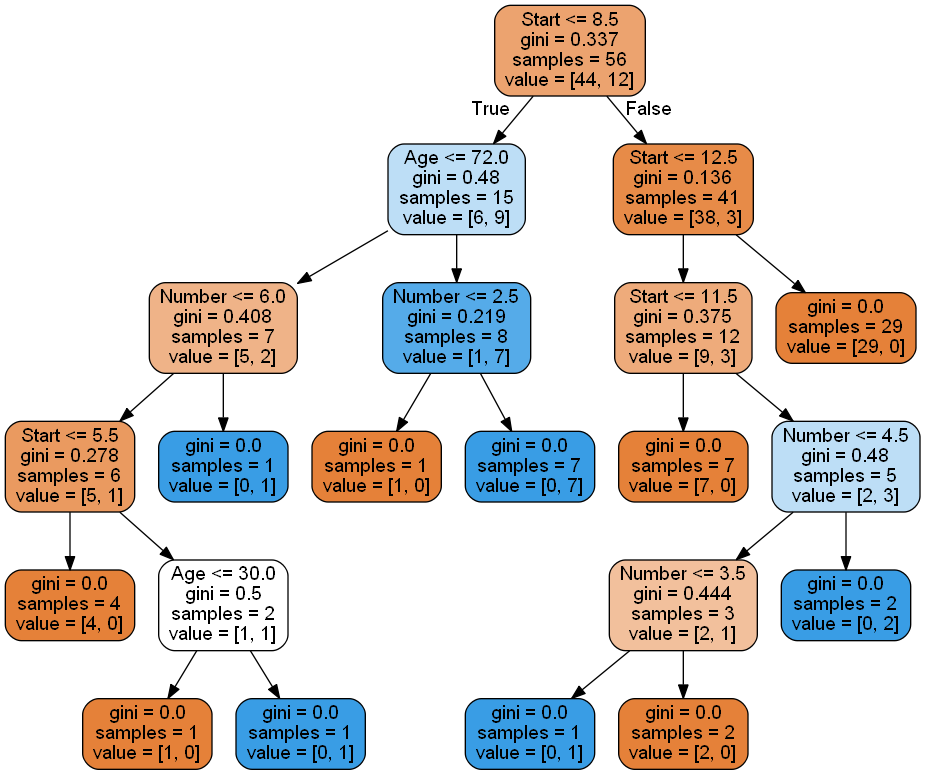

In [18]:
# 그래프 가장 상위 Start가 중요한 분류 column이다.

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,\
                filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rfc_pred = rfc.predict(x_test)

In [21]:
print(confusion_matrix(y_test, rfc_pred))

[[18  2]
 [ 4  1]]


In [22]:
# 분류 absent와 present 두가지고
# support값은 각 분류에 해당되는 값의 갯수를 의미한다.

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.82      0.90      0.86        20
     present       0.33      0.20      0.25         5

   micro avg       0.76      0.76      0.76        25
   macro avg       0.58      0.55      0.55        25
weighted avg       0.72      0.76      0.74        25



In [23]:
rfc.predict_proba(x_test)[:5]

array([[1.  , 0.  ],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [24]:
rfc.feature_importances_

array([0.31510903, 0.30096175, 0.38392923])